In [33]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

In [34]:
def getDummy(df):
    df_dummy = pd.get_dummies(df,drop_first=True)
    return df_dummy

def dropYZ(df):
    df_drop = df.drop(columns=["y","z"],axis=1)
    return df_drop
    
def dropXYZ(df):
    df_drop = df.drop(columns=["x","y","z"],axis=1)
    return df_drop

def standarize(df):
    df_standar = df.set_index("id")
    

def dropPrice(df):
    df_drop = df.drop(columns=["price"],axis=1)
    return df_drop

def toCSV(df,name):
    df.to_csv(f"../outputs/{name}.csv")
    
def indexId(df):
    df_id = df.set_index("id")
    return df_id

def getStandarTrain(dftr,dftt):
    dftr = indexId(dftr)
    dftr = getDummy(dftr)
    dftr = dropXYZ(dftr)
    
    X = dropPrice(dftr)
    y = dftr["price"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    dftt_standar = dftt.set_index("id")
    dftt_standar = getDummy(dftt_standar)
    dftt_standar = dropXYZ(dftt_standar)

    #NO HAY QUE HACER FIT EN TEST: NO --> scaler.fit(dftt_standar)

    Xtt_scaler = scaler.transform(dftt_standar)

    Xtt_scaler = pd.DataFrame(Xtt_scaler)

    return X_train, X_test, y_train, y_test, Xtt_scaler

In [35]:
# TRAINING dataset
dftr = pd.read_csv("../inputs/diamonds_train.csv")
dftr.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [36]:
# TEST dataset
dftt = pd.read_csv("../inputs/diamonds_test.csv")
dftt.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


# 6 Model

In [10]:
from sklearn.svm import SVR

In [11]:
X_train, X_test, y_train, y_test, dftt_scaler = getStandarTrain(dftr,dftt)

In [12]:
model_clf = SVR(C=1.0, epsilon=0.2) 

model_clf.fit(X_train, y_train)

print(X_train.shape,y_train.shape)

y_pred = model_clf.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
print("r2:",r2)

y_test_pred = model_clf.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
print("r2_test:",r2_test)

(32276, 20) (32276,)
r2: 0.04515321930489291
r2_test: 0.048563485519024785


In [32]:
y_six = model_clf.predict(dftr_scaler)

ValueError: X.shape[1] = 21 should be equal to 20, the number of features at training time

In [14]:
dftr_scaler["price"]=y_six

In [22]:
df_res6 = pd.DataFrame()
df_res6["predicc"]=y_test_pred.round(2)
df_res6["test"]=y_test.reset_index(drop=True)
df_res6["diff"]=abs(y_test_pred - y_test.reset_index(drop=True))

df_res6

,predicc,test,diff
0,2141.69,730,1411.693831
1,3749.67,15773,12023.329417
2,1997.95,489,1508.950692
3,2520.49,2736,215.509705
4,3602.48,6646,3043.518125
...,...,...,...
8064,2058.44,1250,808.438017
8065,3419.09,8794,5374.913513
8066,2176.78,1314,862.784692
8067,1767.44,1102,665.436125


In [21]:
msre6 = mean_squared_error(y_test, y_test_pred)
msre6

15359269.756078724

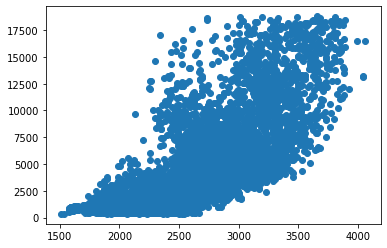

In [23]:
test6_df = df_res6[["predicc","test"]].sort_values("test",ascending=True).reset_index()
plt.scatter(test6_df["predicc"], test6_df["test"])

In [29]:
dftr_scaler

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,price
0,0.637766,0.317801,0.240794,-0.316336,-0.815580,1.708895,-0.537758,-0.472025,-0.463514,-0.516063,...,-0.335361,-0.231369,-0.18526,-0.563801,2.204746,-0.423376,-0.540056,-0.269600,-0.324565,3365.862202
1,-0.608180,0.527444,-0.205573,-0.316336,1.226121,-0.585174,-0.537758,-0.472025,-0.463514,-0.516063,...,2.981864,-0.231369,-0.18526,1.773675,-0.453567,-0.423376,-0.540056,-0.269600,-0.324565,2392.746002
2,2.601715,0.108158,0.687162,-0.316336,-0.815580,1.708895,-0.537758,-0.472025,-0.463514,1.937747,...,-0.335361,-0.231369,-0.18526,1.773675,-0.453567,-0.423376,-0.540056,-0.269600,-0.324565,3711.819815
3,0.870061,-1.219582,1.133529,-0.316336,-0.815580,1.708895,-0.537758,-0.472025,2.157434,-0.516063,...,-0.335361,-0.231369,-0.18526,1.773675,-0.453567,-0.423376,-0.540056,-0.269600,-0.324565,3090.982773
4,-0.523709,0.038277,-1.098308,-0.316336,1.226121,-0.585174,-0.537758,-0.472025,2.157434,-0.516063,...,-0.335361,-0.231369,-0.18526,1.773675,-0.453567,-0.423376,-0.540056,-0.269600,-0.324565,2151.354607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,-1.051653,-1.219582,0.240794,-0.316336,-0.815580,1.708895,-0.537758,2.118533,-0.463514,-0.516063,...,-0.335361,-0.231369,-0.18526,-0.563801,-0.453567,-0.423376,1.851661,-0.269600,-0.324565,1920.099668
13445,-0.523709,-0.660534,-0.651940,-0.316336,1.226121,-0.585174,-0.537758,-0.472025,-0.463514,-0.516063,...,-0.335361,-0.231369,-0.18526,-0.563801,-0.453567,-0.423376,-0.540056,-0.269600,3.081047,1938.658189
13446,-1.199477,-0.311128,0.240794,-0.316336,-0.815580,-0.585174,1.859573,2.118533,-0.463514,-0.516063,...,-0.335361,-0.231369,-0.18526,-0.563801,-0.453567,-0.423376,-0.540056,3.709193,-0.324565,1950.304489
13447,-1.051653,-0.241247,0.240794,-0.316336,1.226121,-0.585174,-0.537758,-0.472025,-0.463514,-0.516063,...,-0.335361,-0.231369,-0.18526,-0.563801,-0.453567,-0.423376,1.851661,-0.269600,-0.324565,1661.700933


In [27]:
dftr_scaler.iloc[0,:]

0           0.637766
1           0.317801
2           0.240794
3          -0.316336
4          -0.815580
5           1.708895
6          -0.537758
7          -0.472025
8          -0.463514
9          -0.516063
10          2.347594
11         -0.335361
12         -0.231369
13         -0.185260
14         -0.563801
15          2.204746
16         -0.423376
17         -0.540056
18         -0.269600
19         -0.324565
price    3365.862202
Name: 0, dtype: float64

## 7 Model

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [42]:
X_train, X_test, y_train, y_test, dftt_scaler = getStandarTrain(dftr,dftt)

In [46]:
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

In [47]:
model_st = RandomForestRegressor(n_estimators=500) 

model_st.fit(X_poly, y_train)

print(X_poly.shape,y_train.shape)

y_pred = model_st.predict(X_poly)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
print("r2:",r2)

y_test_pred = model_st.predict(X_test_poly)

r2_test = metrics.r2_score(y_test,y_test_pred)
print("r2_test:",r2_test)

(32276, 231) (32276,)
r2: 0.9968704350135054
r2_test: 0.9781413380658182


In [49]:
Xtt_poly = polynomial_features.fit_transform(dftt_scaler)
y_seven = model_st.predict(Xtt_poly)

In [51]:
dftt_scaler["price"]=y_seven

In [53]:
df_res7 = pd.DataFrame()
df_res7["predicc"]=y_test_pred.round(2)
df_res7["test"]=y_test.reset_index(drop=True)
df_res7["diff"]=(y_test_pred - y_test.reset_index(drop=True))

df_res7.sort_values("diff",ascending=False).head(50)

,predicc,test,diff
3964,16055.13,8807,7248.133000
4661,17299.81,10470,6829.813333
5105,15971.44,9856,6115.437667
4115,15763.28,10437,5326.280100
7784,16041.41,10716,5325.411500
5770,16919.41,11602,5317.410000
5822,14701.34,9853,4848.338000
1491,17214.87,12883,4331.871905
3246,16063.98,11795,4268.979329
7188,10261.35,5998,4263.352800


In [55]:
msre7 = mean_squared_error(y_test, y_test_pred)
msre7

341825.65650641226

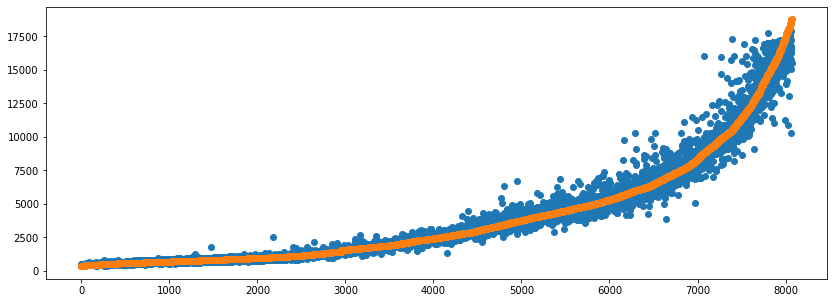

In [57]:
plt.figure(figsize=(14,5))
test7_df = df_res7[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True)
plt.plot(test7_df,"o");

In [58]:
dftt_scaler = dftt_scaler[['price']]
dftt_scaler.index.names = ['id']
dftt_scaler

,price
id,
0,4493.015643
1,1043.925752
2,16660.469900
3,6760.384800
4,1611.986500
...,...
13444,776.467452
13445,2446.474667
13446,502.272000


In [60]:
toCSV(dftt_scaler,"d3_s3")

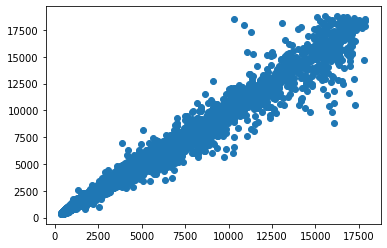

In [61]:
plt.scatter(test7_df["predicc"], test7_df["test"])

# 8 Model

In [ ]:
X_train, X_test, y_train, y_test, dftt_scaler = getStandarTrain(dftr,dftt)

polynomial_features= PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

model_st = RandomForestRegressor(n_estimators=500) 

model_st.fit(X_poly, y_train)

print(X_poly.shape,y_train.shape)

y_pred = model_st.predict(X_poly)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
print("r2:",r2)

y_test_pred = model_st.predict(X_test_poly)

r2_test = metrics.r2_score(y_test,y_test_pred)
print("r2_test:",r2_test)

Xtt_poly = polynomial_features.fit_transform(dftt_scaler)
y_eight = model_st.predict(Xtt_poly)

dftt_scaler["price"]=y_eight

df_res8 = pd.DataFrame()
df_res8["predicc"]=y_test_pred.round(2)
df_res8["test"]=y_test.reset_index(drop=True)
df_res8["diff"]=(y_test_pred - y_test.reset_index(drop=True))

display(df_res8.sort_values("diff",ascending=False).head(10))

msre8 = mean_squared_error(y_test, y_test_pred)
print(msre8)

plt.figure(figsize=(14,5))
test8_df = df_res8[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True)
plt.figure(figsize=(12,6))
plt.plot(test8_df,"o")

dftt_scaler = dftt_scaler[['price']]
dftt_scaler.index.names = ['id']

toCSV(dftt_scaler,"d3_s4")

plt.figure(figsize=(12,6))
plt.scatter(test8_df["predicc"], test8_df["test"])